In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import det,inv
from math import sqrt,pi
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,roc_curve,classification_report


import seaborn as sns

In [52]:

    
    def qdaLearn(X,y):

        covmats = []
        # calculating no:of unique labels
        labels = np.unique(y)

        total_label   = labels.shape[0]
        total_feature = X.shape[1]

        means  = np.zeros([total_label,total_feature])

        r = 0
        for i in labels:
            data = X[np.where(y == i)[0],]

            m = np.mean(data,axis=0)
            means[r,] = m
            r +=1
            data_transpose = np.transpose(data)
            covmats.append(np.cov(data_transpose))
       
        return means,covmats,labels

    def qdaTest(means,covmats,Xtest,ytest,labels):

        r = Xtest.shape[0]
        c = means.shape[0]
        res = np.zeros((r,c))
        z = []
        for j in range(means.shape[0]):
            f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmats[j]))
            res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmats[j])),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))
            z.append(res)
        z = np.array(z)
        if 0 in labels:
            ypred = np.argmax(res,axis=1) 
        else:
            ypred = np.argmax(res,axis=1) + 1
        
        res = (ypred == ytest.ravel())
        acc_data = np.where(res)[0]
        acc = len(acc_data)
        return float(acc)/len(ytest),ypred,z
    
    def plot_roc_cur(ytest,ypred): 
    
        fpr,tpr, thresholds = roc_curve(ytest, ypred) 
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print('Classification Report',classification_report(ytest,ypred))

Accuracy : 0.8333333333333334


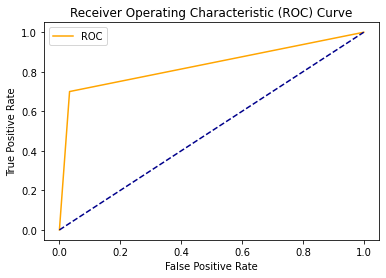

Classification Report               precision    recall  f1-score   support

           0       0.76      0.97      0.85        30
           1       0.95      0.70      0.81        30

    accuracy                           0.83        60
   macro avg       0.86      0.83      0.83        60
weighted avg       0.86      0.83      0.83        60

Parameters of the model are:
 -0.7299956291570617 [0.4592803  0.83301217]


array([[278.45320911, -53.13457557],
       [-53.13457557, 141.61076605]])

In [53]:
data1 =pd.read_csv('data1.csv',header=None)
X=data1.iloc[:,:-1]
X=np.array(X)
Y=data1.iloc[:,-1]
Y=Y.replace(to_replace =-1,value=0)
Y=np.array(Y)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

mean1,cov1,label1 = qdaLearn(xtrain,ytrain)

acc1,y_pred1,res =qdaTest(mean1,cov1,xtest,ytest,label1)
print('Accuracy :',acc1)
 
plot_roc_cur(ytest,y_pred1)
def para(y_pred1,mean1,cov1):
    c,d=0,0
    for i in y_pred1:

        if i==1:
            c+=1
        elif i==0:
            d+=1
    p_p = c/len(y_pred1)
    p_n = d/len(y_pred1)

    w0 =np.dot(((mean1[1]-mean1[0])),np.dot((inv(cov1[1])-inv(cov1[0])),((np.transpose(mean1[1]-mean1[0])))))*(-0.5) + np.log(p_p/p_n) + 0.5*np.log(det(cov1[0])/det(cov1[1]))
    ((np.transpose(mean1[1]))-(np.transpose(mean1[0])))*(inv(cov1[1])-inv(cov1[0]))*(np.transpose(mean1[1])-np.transpose(mean1[0]))*(-0.5)
    #v=(inv(cov1[1])-inv(cov1[0]))
    #b=(((mean1[1]-mean1[0])).reshape(2,1))
    #np.dot(v,b)
    w1 = np.dot((inv(cov1[1])+inv(cov1[0])),(mean1[1]+mean1[0]))
    return print('Parameters of the model are:\n',w0,w1)
para(y_pred1,mean1,cov1)
cov1[0]

<ipython-input-52-436944876f10>:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  res = (ypred == ytest.ravel())


Text(0.5, 1.0, 'QDA')

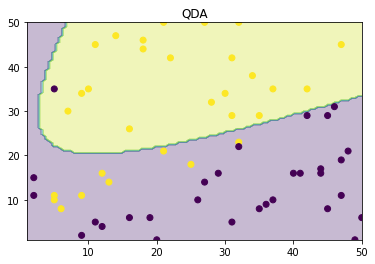

In [54]:
x1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()
zacc,zqdares,zres = qdaTest(mean1,cov1,xx,np.zeros((xx.shape[0],2)),label1)
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)
plt.title('QDA')

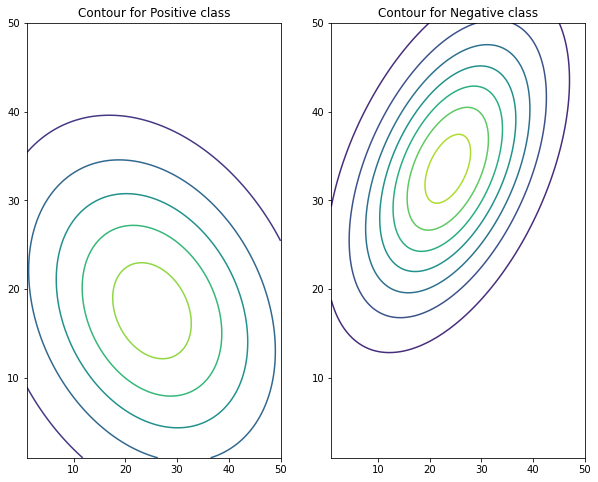

In [55]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
#fig = plt.figure(figsize=(12, 6))

X,Y = np.meshgrid(x1,x2)
pos =np.array([X.flatten(),Y.flatten()]).T
rv1 = multivariate_normal(mean1[0],cov1[0])
fig = plt.figure(figsize=(10,8))
ax0=fig.add_subplot(121)
ax0.contour(X,Y,rv1.pdf(pos).reshape(100,100))
ax0.set_title('Contour for Positive class')
rv2 = multivariate_normal(mean1[1],cov1[1])

ax0=fig.add_subplot(122)
ax0.set_title('Contour for Negative class')
ax0.contour(X,Y,rv2.pdf(pos).reshape(100,100))

plt.show()

Text(0.5, 0, 'Y axis')

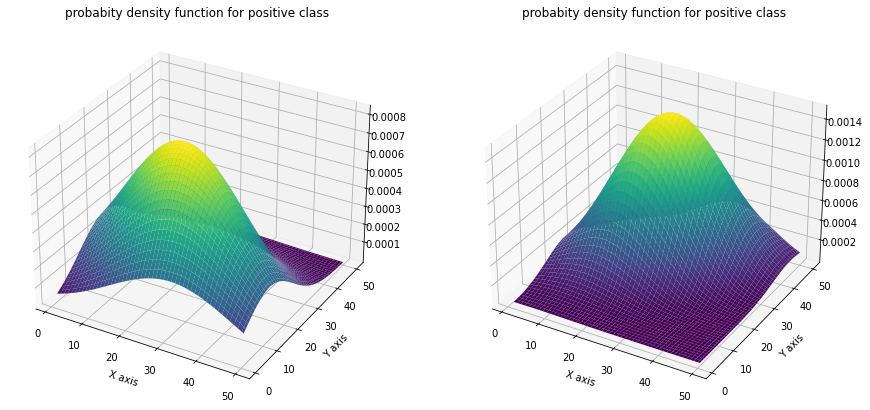

In [56]:
pos1 = np.empty(X.shape + (2,))
pos1[:,:,0]=X
pos1[:,:,1]=Y
fig = plt.figure(figsize=(15,8))
ax=fig.add_subplot(121,projection='3d')
ax.set_title('probabity density function for positive class')
ax.plot_surface(X,Y,rv1.pdf(pos1),cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

ax=fig.add_subplot(122,projection='3d')
ax.set_title('probabity density function for positive class')
ax.plot_surface(X,Y,rv2.pdf(pos1),cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')


Accuracy : 0.9333333333333333


<ipython-input-52-436944876f10>:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  res = (ypred == ytest.ravel())


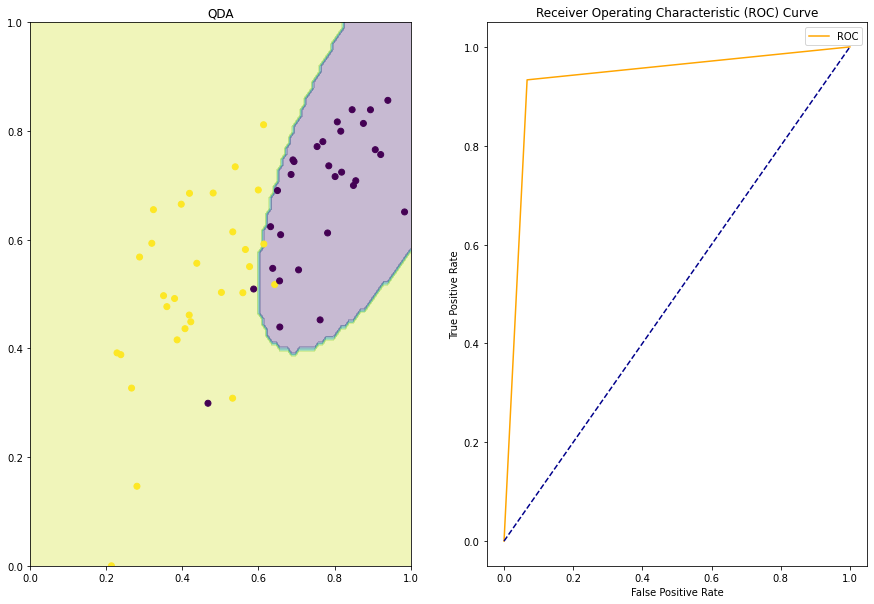

Classification Report               precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        30

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

Parameters of the model are:
 2.092951988694131 [137.05753585  29.55009541]


In [57]:
data2 =pd.read_csv('data2.csv',header=None)
X2=data2.iloc[:,:-1]
scaler2 = preprocessing.MinMaxScaler()
X2 = scaler2.fit_transform(X2)
X2=np.array(X2)
Y2=data2.iloc[:,-1]
#Y2=Y2.replace(to_replace =-1,value=0)
Y2=np.array(Y2)

xtrain2,xtest2,ytrain2,ytest2=train_test_split(X2,Y2,test_size=0.3,random_state=1)
mean2,cov2,label2 = qdaLearn(xtrain2,ytrain2)

acc2,y_pred2,z2 =qdaTest(mean2,cov2,xtest2,ytest2,label2)
print('Accuracy :',acc2)

x21 = np.linspace(X2[:,0].min(),X2[:,0].max(),100)
x22 = np.linspace(X2[:,1].min(),X2[:,1].max(),100)
xx21,xx22 = np.meshgrid(x21,x22)
xx2 = np.zeros((x21.shape[0]*x22.shape[0],2))
xx2[:,0] = xx21.ravel()
xx2[:,1] = xx22.ravel()

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
zacc2,zqdares2,zres2 = qdaTest(mean2,cov2,xx2,np.zeros((xx2.shape[0],2)),label2)
plt.contourf(x21,x22,zqdares2.reshape((x21.shape[0],x22.shape[0])),alpha=0.3)
plt.scatter(xtest2[:,0],xtest2[:,1],c=ytest2)
plt.title('QDA')

plt.subplot(1,2,2)

plot_roc_cur(ytest2,y_pred2)

para(y_pred2,mean2,cov2)


Accuracy : 0.8888888888888888


<ipython-input-52-436944876f10>:40: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  res = (ypred == ytest.ravel())


Classification Report               precision    recall  f1-score   support

           1       1.00      0.89      0.94        28
           2       0.91      0.88      0.89        33
           3       0.79      0.90      0.84        29

    accuracy                           0.89        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.90      0.89      0.89        90



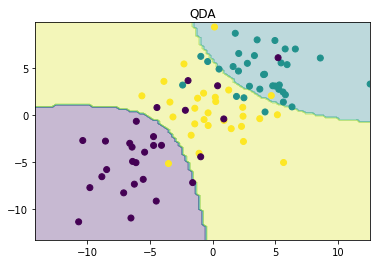

In [58]:
data3 =pd.read_csv('data3.csv',header=None)
X3=data3.iloc[:,:-1]
#scaler2 = preprocessing.MinMaxScaler()
#X2 = scaler2.fit_transform(X2)
X3=np.array(X3)
Y3=data3.iloc[:,-1]
#Y2=Y2.replace(to_replace =-1,value=0)
Y3=np.array(Y3)

xtrain3,xtest3,ytrain3,ytest3=train_test_split(X3,Y3,test_size=0.3,random_state=1)
mean3,cov3,labels3 = qdaLearn(xtrain3,ytrain3)

acc3,y_pred3,z3 =qdaTest(mean3,cov3,xtest3,ytest3,labels3)
print('Accuracy :',acc3)

x31 = np.linspace(X3[:,0].min(),X3[:,0].max(),100)
x32 = np.linspace(X3[:,1].min(),X3[:,1].max(),100)
xx31,xx32 = np.meshgrid(x31,x32)
xx3 = np.zeros((x31.shape[0]*x32.shape[0],3))
xx3[:,0] = xx31.ravel()
xx3[:,1] = xx32.ravel()


zacc3,zqdares3,zres3 = qdaTest(mean3,cov3,xx3,np.zeros((xx3.shape[0],2)),labels3)
plt.contourf(x31,x32,zqdares3.reshape((x31.shape[0],x32.shape[0])),alpha=0.3)
plt.scatter(xtest3[:,0],xtest3[:,1],c=ytest3)
plt.title('QDA')

print('Classification Report',classification_report(ytest3,y_pred3))



In [59]:
class GaussianNB():
    def __init__(self):
        pass

    def fit(self, X, y):
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)]
                        for i in separated])
        
        return self

    def _prob(self, x, mean, std):
        exponent = np.exp(- ((x - mean)**2 / (2 * std**2)))
        return np.log(exponent / (np.sqrt(2 * np.pi) * std))

    def predict_log_proba(self, X):
        return [[sum(self._prob(i, *s) for s, i in zip(summaries, x))
                for summaries in self.model] for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [60]:
data4 =pd.read_csv('data4.csv',header=None)
X4=data4.iloc[:,:-1]
#scaler2 = preprocessing.MinMaxScaler()
#X2 = scaler2.fit_transform(X2)
X4=np.array(X4)
Y4=data4.iloc[:,-1]
Y4=Y4.replace(to_replace =-1,value=0)
Y4=np.array(Y4)

xtrain4,xtest4,ytrain4,ytest4=train_test_split(X4,Y4,test_size=0.3,random_state=42)
GNB = GaussianNB()
GNB.fit(xtrain4,ytrain4)
y_pred4 = GNB.predict(xtest4)
acc4 =GNB.score(xtest4,ytest4)
print('Accuracy',acc4)
print('Classification Report',classification_report(ytest4,y_pred4))
data4

Accuracy 0.9038461538461539
Classification Report               precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.93      0.89      0.91        28

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



,0,1,2,3
0,1,1,2,1
1,1,1,5,1
2,1,1,6,1
3,1,2,1,-1
4,1,2,5,1
...,...,...,...,...
166,8,6,7,1
167,8,7,1,-1
168,8,7,2,-1
169,8,8,1,-1


In [61]:
data5 =pd.read_csv('data5.csv',header=None)
X5=data5.iloc[:,:-1]
#scaler2 = preprocessing.MinMaxScaler()
#X2 = scaler2.fit_transform(X2)
X5=np.array(X5)
Y5=data5.iloc[:,-1]
Y5=Y5.replace(to_replace =-1,value=0)
Y5=np.array(Y5)

xtrain5,xtest5,ytrain5,ytest5=train_test_split(X5,Y5,test_size=0.3,random_state=42)
GNB.fit(xtrain5,ytrain5)
y_pred5 = GNB.predict(xtest5)
acc5 =GNB.score(xtest5,ytest5)
print('Accuracy',acc5)


Accuracy 1.0


In [62]:
class multinomialNB():
    def __init__(self, alpha=1):
        self.alpha = alpha 

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)

        # init: Prior & Likelihood
        self._priors = np.zeros(n_classes)
        self._likelihoods = np.zeros((n_classes, n))

        # Get Prior and Likelihood
        for idx, c in enumerate(self._classes):
            X_train_c = X_train[c == y_train]
            self._priors[idx] = X_train_c.shape[0] / m 
            self._likelihoods[idx, :] = ((X_train_c.sum(axis=0)) + self.alpha) / (np.sum(X_train_c.sum(axis=0) + self.alpha))


    def predict(self, X_test):
        return [self._predict(x_test) for x_test in X_test]

    def _predict(self, x_test):
        # Calculate posterior for each class
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior_c = np.log(self._priors[idx])
            likelihoods_c = self.calc_likelihood(self._likelihoods[idx,:], x_test)
            posteriors_c = np.sum(likelihoods_c) + prior_c
            posteriors.append(posteriors_c)
            

        return self._classes[np.argmax(posteriors)]
    

    def calc_likelihood(self, cls_likeli, x_test):
        return np.log(cls_likeli) * x_test

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.sum(y_pred == y_test)/len(y_test)
    


Accuracy 0.9841269841269841
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.99        38

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



,0,1,2,3
0,12,10,28,0
1,13,10,27,0
2,14,8,28,0
3,14,12,24,0
4,14,13,23,0
...,...,...,...,...
203,20,19,11,1
204,20,21,9,1
205,21,19,10,1
206,21,20,9,1


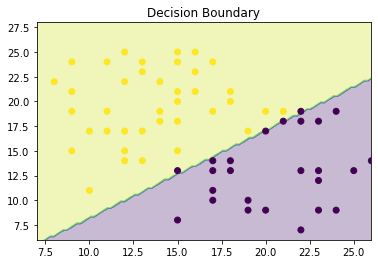

In [63]:
data6 =pd.read_csv('data6.csv',header=None)
X6=data6.iloc[:,:-1]
#scaler2 = preprocessing.MinMaxScaler()
#X2 = scaler2.fit_transform(X2)
X6=np.array(X6)
Y6=data6.iloc[:,-1]
Y6=np.array(Y6)

xtrain6,xtest6,ytrain6,ytest6=train_test_split(X6,Y6,test_size=0.3,random_state=42)

MNB = multinomialNB()
MNB.fit(xtrain6,ytrain6)
y_pred6=MNB.predict(xtest6)
acc6=MNB.score(xtest6,ytest6)
print('Accuracy',acc6)
print('Classification Report',classification_report(ytest6,y_pred6))

x61 = np.linspace(X6[:,0].min(),X6[:,0].max(),100)
x62 = np.linspace(X6[:,1].min(),X6[:,1].max(),100)
xx61,xx62 = np.meshgrid(x61,x62)
xx6 = np.zeros((x61.shape[0]*x62.shape[0],3))
xx6[:,0] = xx61.ravel()
xx6[:,1] = xx62.ravel()
pred6 =MNB.predict(xx6)
pred6 = np.array(pred6)
#print(pred6.shape)
plt.contourf(x61,x62,pred6.reshape((x61.shape[0],x62.shape[0])),alpha=0.3)

plt.scatter(xtest6[:,0],xtest6[:,1],c=ytest6)
plt.title('Decision Boundary')

c,d =0,0
for i in y_pred6:
    if i==1:
        c+=1
    else:
        d+=1
p_prob = c/len(y_pred6)

w0 = np.log(p_prob)
data6

In [13]:
data7 = pd.read_csv('ionosphere.data',header=None)
#drop out the 2nd column and last column
data7.drop(data7.columns[[1,34]],axis=1,inplace=True)
Y7 = data7.iloc[:,0]
X7 = data7.iloc[:,1:]

scaler2 = preprocessing.MinMaxScaler()
X7 = scaler2.fit_transform(X7)
X7=np.array(X7)
Y7=np.array(Y7)

#xtrain7,xtest7,ytrain7,ytest7=train_test_split(X7,Y7,test_size=0.3,random_state=42)
#mean7,cov7,label7 = qdaLearn(xtrain7,ytrain7)
#acc7,y_pred7 =qdaTest(mean7,cov7,xtest7,ytest7,label7)
#print(acc7)
s71,s72=[],[]

for i in np.arange(0.1,0.4,0.05):
    xtrain7,xtest7,ytrain7,ytest7=train_test_split(X7,Y7,test_size=i,random_state=42)
    GNB = GaussianNB()
    GNB.fit(xtrain7,ytrain7)
    pr = GNB.predict(xtest7)
    sc= GNB.score(xtest7,ytest7)
    s71.append(sc)

#for i in np.arange(0.1,0.4,0.05):
    #xtrain,xtest,ytrain,ytest=train_test_split(X8,Y8,test_size=i,random_state=1)
    mean7,cov7,label7 = qdaLearn(xtrain7,ytrain7)

    acc7,y_pred7,z =qdaTest(mean7,cov7,xtest7,ytest7,label7)
    s72.append(acc7)
df_7 = {'NB':s71,'QDA':s72}
df_7 = pd.DataFrame(df_7)
print('Accuracy by QDA',np.mean(np.array(s72)))
print('Accuracy by Naive Bayes',np.mean(np.array(s71)))

from scipy import stats
stats.ttest_rel(df_7['NB'],df_7['QDA'])

<ipython-input-2-436944876f10>:32: RuntimeWarning: overflow encountered in exp
  res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmats[j])),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))
<ipython-input-2-436944876f10>:31: RuntimeWarning: invalid value encountered in sqrt
  f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmats[j]))


Accuracy by QDA 0.5495351691174345
Accuracy by Naive Bayes 0.7958644281390538


Ttest_relResult(statistic=2.3317962415700637, pvalue=0.0584967687350067)

In [16]:
k = 10
kf = KFold(n_splits=k, random_state=None)

In [14]:
data8 = pd.read_csv('abalone.data',header=None)
X8 = data8.iloc[:,1:]
scaler = preprocessing.MinMaxScaler()
X8 = scaler.fit_transform(X8)

X8 =np.array(X8)
Y8 = data8.iloc[:,0]
Y8 = Y8.replace(to_replace=('M','F','I'),value=(0,1,2))
Y8 =np.array(Y8)



s81,s82=[],[]

for i in np.arange(0.1,0.4,0.05):
    xtrain8,xtest8,ytrain8,ytest8=train_test_split(X8,Y8,test_size=i,random_state=1)
    GNB = GaussianNB()
    GNB.fit(xtrain8,ytrain8)
    pr = GNB.predict(xtest8)
    sc= GNB.score(xtest8,ytest8)
    s81.append(sc)
#for i in np.arange(0.1,0.4,0.05):
    #xtrain,xtest,ytrain,ytest=train_test_split(X8,Y8,test_size=i,random_state=1)
    mean8,cov8,label8 = qdaLearn(xtrain8,ytrain8)

    acc8,y_pred8,z =qdaTest(mean8,cov8,xtest8,ytest8,label8)
    s82.append(acc8)
df_8 = {'NB':s81,'QDA':s82}
df_8 = pd.DataFrame(df_8)
df_8
print('Accuracy by QDA',np.mean(np.array(s82)))
print('Accuracy by Naive Bayes',np.mean(np.array(s81)))

from scipy import stats
stats.ttest_rel(df_8['NB'],df_8['QDA'])


Accuracy by QDA 0.529399239468585
Accuracy by Naive Bayes 0.5161139602207298


Ttest_relResult(statistic=-4.061157184981484, pvalue=0.006641812253808534)